# Unit Project 2: Exploratory Data Analysis

# outline

### (1) acquire the data
* understand the type of data you're working with
* calculate the mean, mode, median, max, min, etc.
* identify in any data is missing

### (2) parse & mine the data
* visualize the data to get a better understanding of the distribution & relationships

### (3) test the data
* test for covariance

### (4) questions & limitations

---

# (1) Acquire the data

In [57]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

df = pd.read_csv(os.path.join('..', 'dataset', 'ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [3]:
# determine how many samples are present & identify any missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


In [4]:
df.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64

In [75]:
df['admit'] = df['admit'].astype('category')
df['prestige'] = df['prestige'].astype('category')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null category
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null category
dtypes: category(2), float64(2)
memory usage: 7.1 KB


#### Summary
>* There are 400 rows of data, with some null values in the GRE, GPA, and Prestige columns.
>* Admit and Prestige were integer and float data types (respectively), but needed to be converted to category

<center> **--------------------** </center>

# (2) Parse & mine the data

##  data dictionary
Variable | Description | Type of Variable | Data Type
---| ---| ---
admit |admitted(1), not admitted(0)  | binary | category
gre | applicant's GRE score, integer | continuous |float
GPA | applicant's GPA, integer | continuous | float
prestige | prestige of applicant's alma mater, <p>1 as highest tier (most prestigeous) and 4 as the lowest tier (least prestigeous) | categorical | category

## distribution of the data

In [78]:
df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [77]:
df.describe()

,gre,gpa
count,398.000000,398.00000
mean,588.040201,3.39093
std,115.628513,0.38063
min,220.000000,2.26000
25%,NaN,NaN
50%,NaN,NaN
75%,NaN,NaN
max,800.000000,4.00000


> **Summary:**
* The range of results in each column fits within what you would expect, (no negative numbers, no numbers above the GPA or GRE score maximums)

## visualizing distribution through histograms

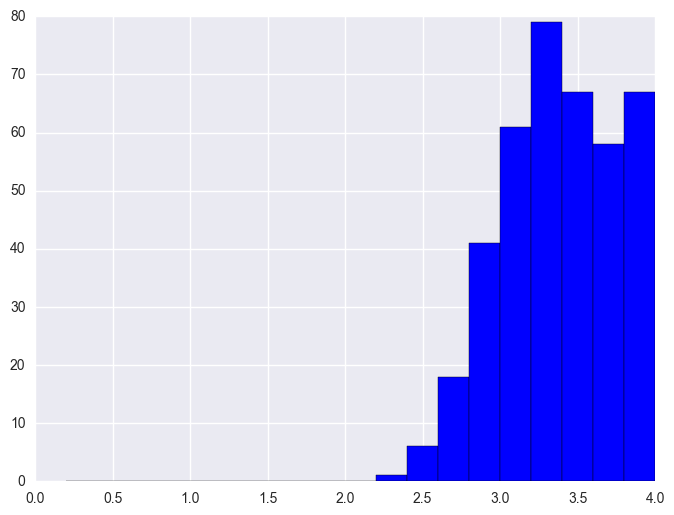

In [79]:
# GPA distribution
plt.hist(df['gpa'], range=(0, df['gpa'].max()),bins=20, color='blue');

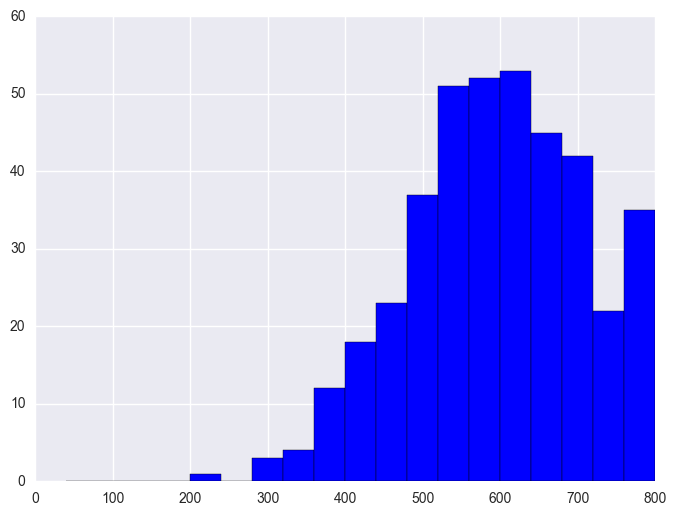

In [80]:
# GRE score distribution
plt.hist(df['gre'], range=(0, df['gre'].max()),bins=20, color='blue');

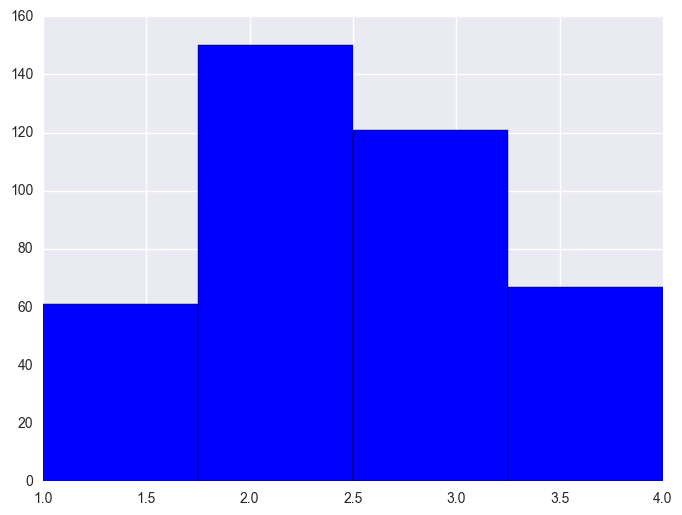

In [88]:
# Prestige distribution
plt.hist(df['prestige'], range=(1, 4), bins=4, color='blue');

## visualizing distribution through box plots

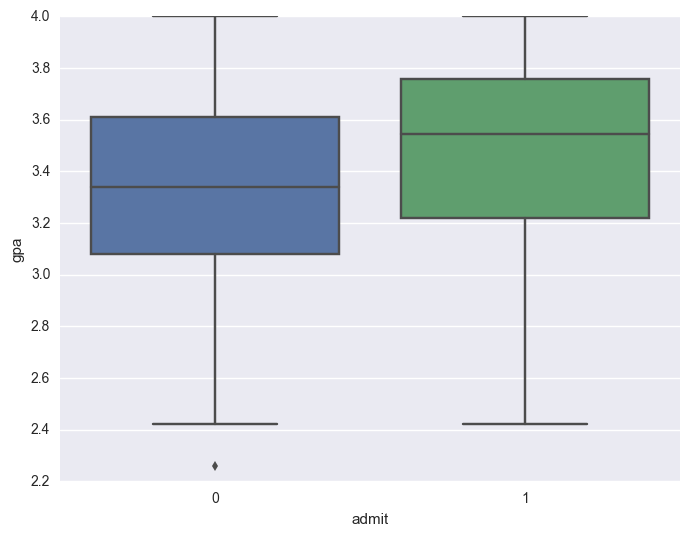

In [89]:
#GPA
sns.boxplot(x=a, y=df['gpa'])

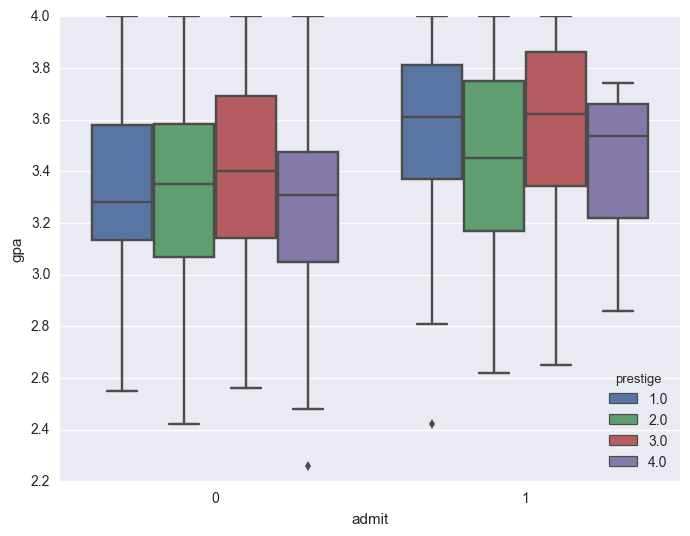

In [91]:
#GPA including prestige
sns.boxplot(x=df['admit'], y=df['gpa'], hue=df['prestige'])

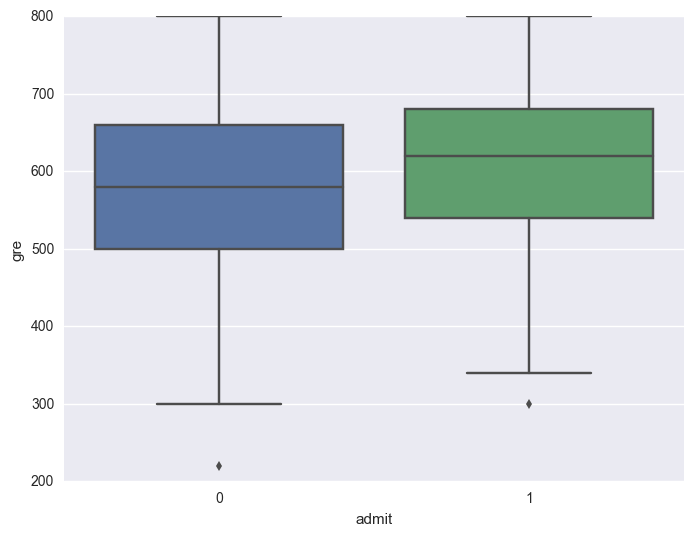

In [93]:
#GRE
sns.boxplot(x=df['admit'], y=df['gre'])

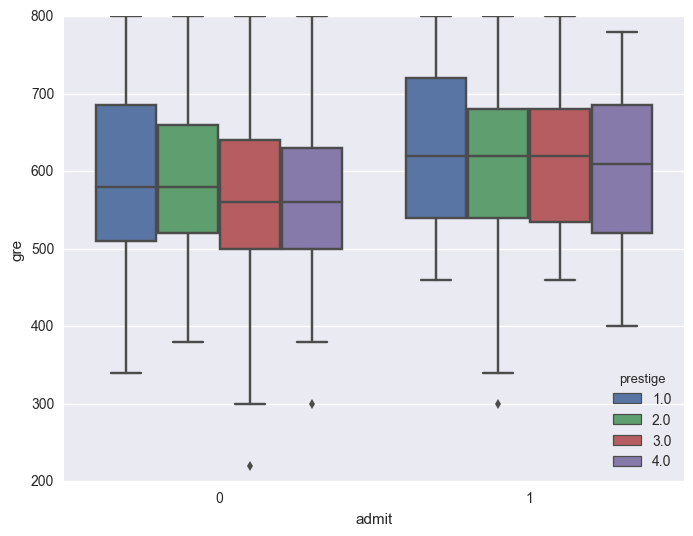

In [94]:
#GRE including Prestige
sns.boxplot(x=df['admit'], y=df['gre'], hue=df['prestige'])

## visualizing relationships through scatterplots 

In [9]:
import seaborn as sns

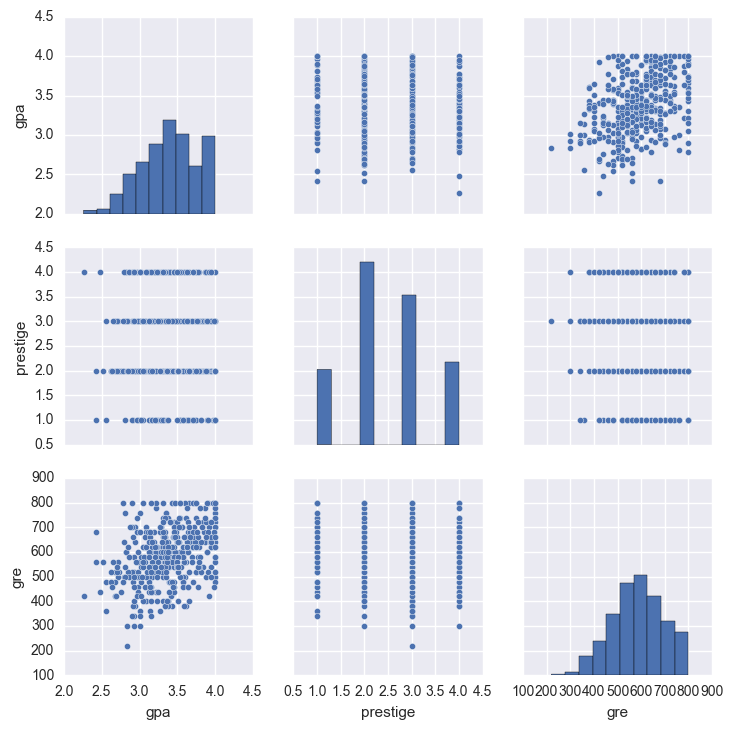

In [98]:
df2 = df.dropna()
sns.pairplot(df2, vars=['gpa','prestige', 'gre'])

## summary of distribution
>* GPA skews high - no candidate has a GPA lower than 2.26. There is also a high number of candidates that have the highest possible GPA (4.0).
>* Similarly, GRE scores skew high, and there is a high number of candidates that have the highest possible GRE score (800).
>* Presitge has a normal distribution, with the majority of candidates coming from alma maters ranked at a prestige of 2 or 3, and fewer candidates coming from the top tier (1) and lowest tier (4).
>* GRE scores are correlated with GPA, but there are some outliers - candidates who had a low GPA, but received the highest possible GRE score, and those who had the highest possible GPA but scored lower on the GRE.

<center> **--------------------** </center>

# (3) Test the data

## covariance matrix

In [65]:
np.cov(df)

array([[  35685.06969167,   62096.75800833,   75371.84166667, ...,
          43302.61440833,   65938.77995833,   56455.20239167],
       [  62096.75800833,  108059.22055833,  131161.05833333, ...,
          75353.59135833,  114744.68720833,   98240.90490833],
       [  75371.84166667,  131161.05833333,  159203.        , ...,
          91463.19166667,  139276.04166667,  119243.40833333],
       ..., 
       [  43302.61440833,   75353.59135833,   91463.19166667, ...,
          52546.88589167,   80015.68654167,   68507.135175  ],
       [  65938.77995833,  114744.68720833,  139276.04166667, ...,
          80015.68654167,  121843.94729167,  104319.072125  ],
       [  56455.20239167,   98240.90490833,  119243.40833333, ...,
          68507.135175  ,  104319.072125  ,   89315.088025  ]])

In [68]:
x = df['gre'].dropna()
y = df['gpa'].dropna()
np.cov(m=(x,y))

array([[  1.33699530e+04,   1.55970406e+01],
       [  1.55970406e+01,   1.44879486e-01]])

# (4) Questions & limitations

>* How do GPA and GRE interact? 
>* While the average GPA and GRE scores of candidates that are admitted are higher, there are candidates from the most prestigious schools, who have the highest possible GPA and GRE scores who are not admitted. Are these outliers? What's the difference between those candidates?
>* How does Prestige impact the correlation between GPA and GRE scores? What other impacts does Prestige have on the likelihood that someone will be admitted into the program? Since Prestige is a categorical variable, it's hard to spot its impact in the visualizations above.